### CODE FOR TIME SERIES CSS MASTERS INTRO

The code here uses LJ electricity prices for examining basic issues in time series.

We construct pictures for the lecture notes

In [20]:
# load data

import numpy as np
import pandas as pd
import datetime
from pandas import Series, DataFrame



bd = pd.read_csv('CSS_Energy.csv', sep=",")

# construct index
bd['Datetime'] =pd.to_datetime(bd.Datetime)
bd = bd.set_index('Datetime')

In [21]:
bd.head()

,LMP,HenryHub
Datetime,,
2012-01-01,27.410687,2.98
2012-01-02,27.860928,2.98
2012-01-03,27.417081,2.97
2012-01-04,26.372413,2.96
2012-01-05,26.780845,2.91


## Plots of the data



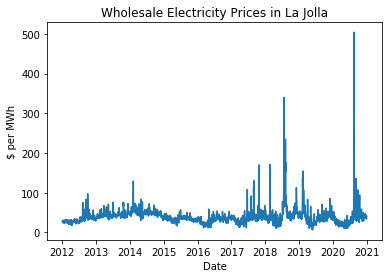

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


# PRICES OVER TIME


sns.lineplot(bd.index,bd['LMP']).set(title='Wholesale Electricity Prices in La Jolla', xlabel='Date', ylabel='$ per MWh')

#plt.savefig('MCEDailyLJ.png')
plt.show()

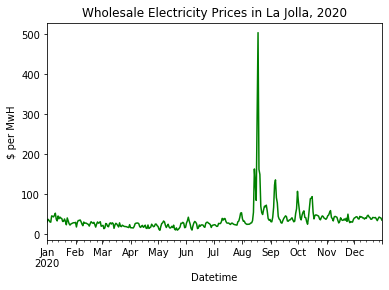

In [5]:
# we can see a bit more clearly what happens within a year looking at just one year

bd.LMP['2020'].plot(color='green')
plt.title('Wholesale Electricity Prices in La Jolla, 2020')
plt.ylabel('$ per MwH')
plt.show()

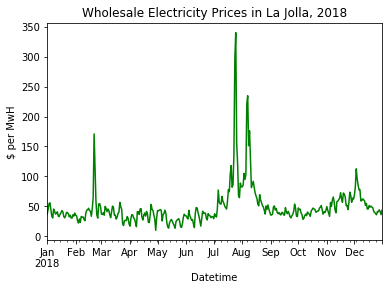

In [6]:
bd.LMP['2018'].plot(color='green')
plt.title('Wholesale Electricity Prices in La Jolla, 2018')
plt.ylabel('$ per MwH')
plt.show()

## Sample means and Randomness

Examine sample means for each year, look at standard errors



In [23]:
am=bd.LMP.resample('Y').mean()
print(am)

Datetime
2012-12-31    33.027329
2013-12-31    44.825278
2014-12-31    50.354044
2015-12-31    34.287818
2016-12-31    31.068251
2017-12-31    37.421917
2018-12-31    48.832337
2019-12-31    39.444670
2020-12-31    36.737415
Freq: A-DEC, Name: LMP, dtype: float64


In [24]:
sd=np.sqrt(bd.LMP.resample('Y').var()/365)
print(sd)

Datetime
2012-12-31    0.510849
2013-12-31    0.385564
2014-12-31    0.494663
2015-12-31    0.304023
2016-12-31    0.433761
2017-12-31    0.807522
2018-12-31    1.731254
2019-12-31    0.932361
2020-12-31    1.802023
Freq: A-DEC, Name: LMP, dtype: float64


In [25]:
asum1 = pd.DataFrame(am)
asum2 = pd.DataFrame(sd)
asum = pd.merge(asum1, asum2, on = 'Datetime')
asum.rename(columns={'LMP_x':'Mean','LMP_y':'Std'}, inplace=True)
#asum.head()
display(asum)

,Mean,Std
Datetime,,
2012-12-31,33.027329,0.510849
2013-12-31,44.825278,0.385564
2014-12-31,50.354044,0.494663
2015-12-31,34.287818,0.304023
2016-12-31,31.068251,0.433761
2017-12-31,37.421917,0.807522
2018-12-31,48.832337,1.731254
2019-12-31,39.444670,0.932361
2020-12-31,36.737415,1.802023


In [ ]:
Do we think that the data is stationary?

The annual means vary quite a bit. 

In [26]:
import statsmodels.formula.api as smf

# Run the regression for 2020 with the 'iid' assumptions.

bd20=bd['2020']
#for i in ['2012','2013','2014','2015','2016','2017','2018','2019','2020']:
reg = smf.ols('LMP ~ 1',data=bd20).fit()
#results = reg.fit()
print(reg.summary())

#reg.params

                            OLS Regression Results                            
Dep. Variable:                    LMP   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Tue, 06 Sep 2022   Prob (F-statistic):                nan
Time:                        09:20:27   Log-Likelihood:                -1814.1
No. Observations:                 366   AIC:                             3630.
Df Residuals:                     365   BIC:                             3634.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.7374      1.800     20.415      0.0

C:\Users\grelliott\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1554: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


In [27]:
# Run the regression for 2020 with the 'iid' assumptions.


#for i in ['2012','2013','2014','2015','2016','2017','2018','2019','2020']:
reg = smf.ols('LMP ~ 1',data=bd['2020']).fit(cov_type='HAC',cov_kwds={'maxlags':5})

print(reg.summary())


                            OLS Regression Results                            
Dep. Variable:                    LMP   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 06 Sep 2022   Prob (F-statistic):                nan
Time:                        09:20:29   Log-Likelihood:                -1814.1
No. Observations:                 366   AIC:                             3630.
Df Residuals:                     365   BIC:                             3634.
Df Model:                           0                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.7374      3.364     10.919      0.0

C:\Users\grelliott\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\grelliott\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\grelliott\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [28]:
# import GDP data for example on non stationary data 

import requests
url1 = 'https://urldefense.com/v3/__http://research.stlouisfed.org/fred2/series/GDP/downloaddata/GDP.csv'*5Cn__;JQ!!Mih3wA!EGlenyiBuTIsWhh-m0CZQ52mpjs5vZJAgkKrCIT-rhXWmVHgMngxEjrmsC3j0xzU5OjZxj_095WmAU8z8gzv$  bd1 = pd.read_csv(url1, index_col=0, parse_dates=True)


In [29]:
bd1.tail()

,VALUE
DATE,
2021-04-01,22740.959
2021-07-01,23202.344
2021-10-01,24002.815
2022-01-01,24386.734
2022-04-01,24882.878


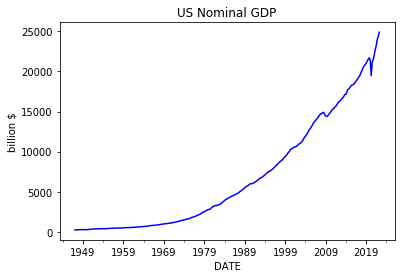

In [30]:
# Graph the data

bd1.VALUE.plot(color='blue')
plt.title('US Nominal GDP')
plt.ylabel('billion $')
#plt.show()

plt.savefig('NominalGDP.png')

### Understanding dynamics for single series

We will look at the covariance function and the model building



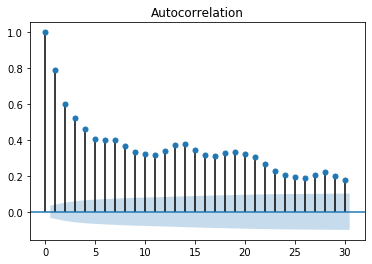

In [26]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# acf_LMP = acf(bd.LMP, nlags=20, fft=False)

plot_acf(bd.LMP.tolist(), lags=30)
plt.savefig('ACF.png')

What does this tell us?

First, these are $ \gamma(k) $ divided by the variance $\gamma(0)$ (this is why the first one is equal to one).

They are positive so this means that the covariances are positive.

They do not die out so quick, so if we did not model the dynamics we would have to use HAC estimators for the variances of estimates. 

In [6]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

mod = AutoReg(bd.LMP, 8)
res = mod.fit()
print(res.summary())

D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                            AutoReg Model Results                             
Dep. Variable:                    LMP   No. Observations:                 3288
Model:                     AutoReg(8)   Log Likelihood              -12763.524
Method:               Conditional MLE   S.D. of innovations             11.851
Date:                Wed, 13 Jul 2022   AIC                              4.951
Time:                        16:03:02   BIC                              4.969
Sample:                    01-09-2012   HQIC                             4.958
                         - 12-31-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.8455      0.567     10.315      0.000       4.735       6.956
LMP.L1         0.8397      0.017     48.096      0.000       0.806       0.874
LMP.L2        -0.2116      0.023     -9.292      0.0

In [7]:
from statsmodels.tsa.api import SARIMAX, AutoReg
from statsmodels.tsa.arima.model import ARIMA

arima_res = ARIMA(bd.LMP, order=(8, 0, 0), trend="c", freq='D').fit()
print(arima_res.summary())

D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                    LMP   No. Observations:                 3288
Model:                 ARIMA(8, 0, 0)   Log Likelihood              -12791.616
Date:                Fri, 02 Sep 2022   AIC                          25603.232
Time:                        14:57:27   BIC                          25664.213
Sample:                    01-01-2012   HQIC                         25625.065
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.5495      2.380     16.616      0.000      34.884      44.215
ar.L1          0.8397      0.005    179.880      0.000       0.831       0.849
ar.L2         -0.2115      0.008    -25.371      0.0

In [8]:
# MA model

nma=20
ma_res = ARIMA(bd.LMP, order=(0, 0, nma), trend="c", freq='D').fit()
print(ma_res.summary())

D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                    LMP   No. Observations:                 3288
Model:                ARIMA(0, 0, 20)   Log Likelihood              -12778.126
Date:                Fri, 02 Sep 2022   AIC                          25600.251
Time:                        14:58:18   BIC                          25734.408
Sample:                    01-01-2012   HQIC                         25648.283
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.5494      1.746     22.652      0.000      36.127      42.971
ma.L1          0.8417      0.005    179.979      0.000       0.833       0.851
ma.L2          0.4951      0.006     87.304      0.0

First, if you run this yourself you will notice that it takes a while. 

This is because it is estimated using Maximum Likelihood (most likely by writing out the state space version of the model). 

The autoregression before can be run by OLS. 

Second, the coefficients themselves trace out the impulse response (with a coefficient of one on the first contempraneous term).

We do this below

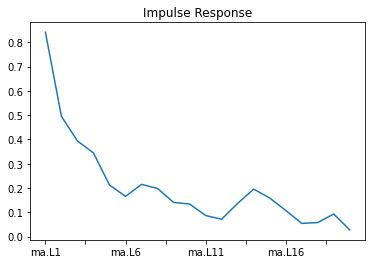

In [12]:
ir=ma_res.params[1:nma+1]
dfir = pd.DataFrame(ir)

#plt.ylabel('')
dfir.plot(legend=False)
plt.title('Impulse Response')
plt.savefig('ImpulseResponse.png')

We can evaluate univariate models (unlike the cross section, where all we could do is estimate a mean).

But it is still more interesting to evaluate multivariate models.

### Multivariate Models

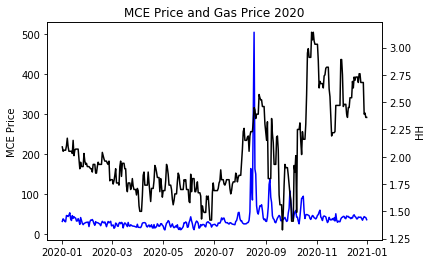

In [4]:
# Graph the data 


import matplotlib.pyplot as plt

bdv = bd[['LMP','HenryHub']]
bdv=bdv['2020']

fig, ax = plt.subplots(1, 1)
ax.plot(bdv['LMP'], 'b')
plt.ylabel('MCE Price')
ax2 = ax.twinx()
ax2.plot(bdv['HenryHub'], 'k')
#ax2.set_xticks(bd1.Date[::12])
#ax2.set_xticklabels(bd1.Date[::12], rotation=45)
plt.title('MCE Price and Gas Price 2020')
plt.ylabel('HH')
plt.draw()
plt.savefig('MCEHH20.png')

The data has different scales - hence the use of two axis to show the y axis. 

In a lot of machine learning approaches the industry standard is to rescale the data by the standard deviation. 
You can do this but it affects the interpretation of the coefficients. In linear models it is entirely unneccessary. 

We will not rescale the data. This way since both are prices and measured in dollars we can easily interpret the coefficients. 

First, run a regression of the LMP (electricity price) on the gas prices. Because we know there is serial correlation, we should
fix the standard errors by using robust standard errors. This is done using the HAC command with 8 lags. 


In [14]:
# run a regression
bdv = bd[['LMP','HenryHub']]
bdv=bdv['2013']
reg = smf.ols('LMP ~ HenryHub',data = bdv).fit(cov_type='HAC',cov_kwds={'maxlags':8})
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    LMP   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     13.42
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           0.000286
Time:                        09:14:47   Log-Likelihood:                -1226.4
No. Observations:                 365   AIC:                             2457.
Df Residuals:                     363   BIC:                             2465.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.5202      7.345      2.385      0.0

## Construct VAR's 

It is generally better to model the dyanamics than fix the standard errors. The most common approach is a vector autoregression.

We construct a VAR, we need to choose the lag length that captures the dynamics. Which we do via teh Akaike Information Criterion (AIC)

In [9]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic


bdv = bd[['LMP','HenryHub']]
bdv=bdv['2020']

for i in [1,2,3,4,5,6,7,8,9,10]:
    model = VAR(bdv,freq="D")
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  2.0168335847072387
BIC:  2.080941486409965

Order = 2
AIC:  2.0348167060363505
BIC:  2.1418813727296677

Order = 3
AIC:  2.0273531018546254
BIC:  2.177550456344179

Order = 4
AIC:  2.0243437499457095
BIC:  2.217850920699477

Order = 5
AIC:  2.0440519692868304
BIC:  2.2810473019276154

Order = 6
AIC:  2.0575900457681944
BIC:  2.3382531147062613

Order = 7
AIC:  2.0766437136538274
BIC:  2.4011553338617615

Order = 8
AIC:  2.090186722407023
BIC:  2.4587289613389336

Order = 9
AIC:  2.1092185006338493
BIC:  2.521974690291066

Order = 10
AIC:  2.1229747433002135
BIC:  2.580129492445678



Notice that this runs fast - even though we just estimated 10 multivariate models. 

This is because we can estimate this efficiently by OLS, a result that is true regardless of the covariance matrix of the residuals.

The AIC takes -2 times the log of the likelihood, and adjusts via a penalty that depends on the number of coefficients and the sample size.

We want to minimize this. Why the penalty?

In [15]:
results = model.fit(3)

print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 13, Jul, 2022
Time:                     16:05:18
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.17755
Nobs:                     363.000    HQIC:                   2.08706
Log likelihood:          -1384.11    FPE:                    7.59403
AIC:                      2.02735    Det(Omega_mle):         7.30941
--------------------------------------------------------------------
Results for equation LMP
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.711146         6.726452           -0.106           0.916
L1.LMP              0.745284         0.052438           14.213           0.000
L1.HenryHub        -5.121350        11.331032           -0.452        

In [16]:
# do for earlier data

bdv = bd[['LMP','HenryHub']]
bdv=bdv['2014']

for i in [1,2,3,4,5,6,7,8,9,10]:
    model = VAR(bdv,freq="D")
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  1.2651320740373808
BIC:  1.329370874053371

Order = 2
AIC:  1.1746625813196707
BIC:  1.281946405955066

Order = 3
AIC:  1.064365156092788
BIC:  1.2148707333457183

Order = 4
AIC:  1.0490474460544439
BIC:  1.2429527182150863

Order = 5
AIC:  1.0393408880488915
BIC:  1.2768250233041787

Order = 6
AIC:  1.0418791888889896
BIC:  1.3231225930691992

Order = 7
AIC:  1.0468303513704627
BIC:  1.3720146798397952

Order = 8
AIC:  1.023774689709869
BIC:  1.393082859403168

Order = 9
AIC:  1.0384464608696888
BIC:  1.4520626624774897

Order = 10
AIC:  1.0607494753953595
BIC:  1.518859185699493



In [17]:
results = model.fit(3)

print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 13, Jul, 2022
Time:                     16:06:09
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    1.21487
Nobs:                     362.000    HQIC:                   1.12420
Log likelihood:          -1205.96    FPE:                    2.89903
AIC:                      1.06437    Det(Omega_mle):         2.79008
--------------------------------------------------------------------
Results for equation LMP
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               8.256718         2.254025            3.663           0.000
L1.LMP              0.638983         0.052918           12.075           0.000
L1.HenryHub         8.972225         1.099618            8.159        

In [10]:
 results = model.fit(5)

print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 02, Sep, 2022
Time:                     15:56:13
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.28105
Nobs:                     361.000    HQIC:                   2.13828
Log likelihood:          -1371.43    FPE:                    7.72213
AIC:                      2.04405    Det(Omega_mle):         7.27219
--------------------------------------------------------------------
Results for equation LMP
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -1.276367         6.883102           -0.185           0.853
L1.LMP              0.749899         0.053473           14.024           0.000
L1.HenryHub        -3.001409        11.562684           -0.260        